In [1]:
import os 
import pandas as pd
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
categories = ['cats','dogs']
flat_data_arr = [] #input array 
target_arr = [] #output array
datadir = 'C:\\Users\\rcc\\Downloads\\training_set'
#path which contains all the categories of images 

for i in categories:
    print(f'loading.... categories : {i}')
    path = os.path.join(datadir,i)
    for img in os.listdir(path):
        img_arr = imread(os.path.join(path,img))
        img_resize = resize (img_arr,(150,150,3))
        flat_data_arr.append(img_resize.flatten())
        target_arr.append(categories.index(i))
    print(f'loaded categories:{i} successfully')
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

loading.... categories : cats
loaded categories:cats successfully
loading.... categories : dogs
loaded categories:dogs successfully


In [3]:
df = pd.DataFrame(flat_data)
df["target"] = target
df.shape

(8005, 67501)

In [4]:
x = df.iloc[0::30,:-1]
y = df.iloc[0::30,-1]

In [5]:
from sklearn.svm import SVC

In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.4,random_state=42)

In [7]:
ok = SVC()
# params = [{'kernel':['linear','poly','sigmoid'],'C':[1,0.1,0.001],'gamma':['auto','scole']}]
# GSCV = GridSearchCV(ok,params,cv=4)
# GSCV.fit(xtrain,ytrain)
# GSCV.best_params_

In [8]:
ok.fit(xtrain,ytrain)

SVC()

In [9]:
ypred = ok.predict(xtest)

In [10]:
accuracy_score(ytest,ypred)

0.5887850467289719

In [11]:
ok1= SVC(kernel='poly',C=100,gamma='auto')
ok1.fit(xtrain,ytrain)
accuracy_score(ok1.predict(xtest),ytest)

0.5046728971962616

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
asd = KNeighborsClassifier(n_neighbors=5)
asd.fit(xtrain,ytrain)

KNeighborsClassifier()

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
tre = DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
accuracy_score(tre.predict(xtest),ytest)

0.4953271028037383

In [16]:
from sklearn.tree import plot_tree

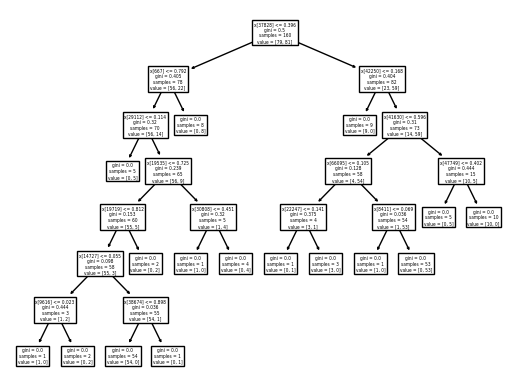

In [17]:
plot_tree(tre)
plt.show()